In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [6]:
x

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [5]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=111)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)

In [10]:
rf_predict=rf_model.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report
measured_values=classification_report(y_test,rf_predict)
print(measured_values)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       116
           1       0.91      0.93      0.92       122

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



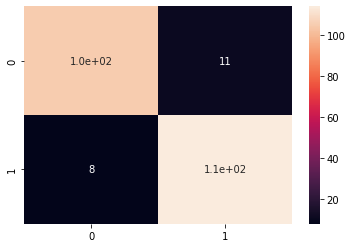

In [12]:
import seaborn as sb
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,rf_predict)
sb.heatmap(cm,annot=True)
plt.show()